# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import random

In [3]:
# include your Project 1 Decision Tree Model as well
#from DT_ import DecisionTreeModel
pass

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [4]:
df = pd.read_csv("wine-tasting.csv")
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,0.47,9.6,white,very acidic,normal
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,0.45,11.0,white,quite acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

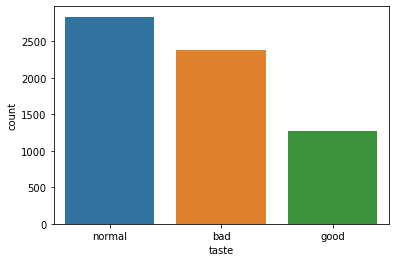

In [5]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

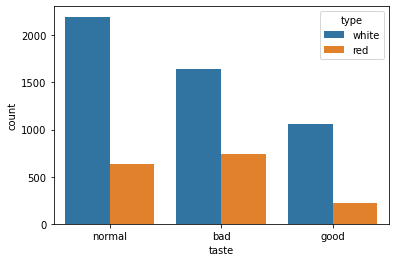

In [6]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

***And answer the following questions based on what you observe from your model building process***

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

In [7]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,0.47,9.6,white,very acidic,normal
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,0.45,11.0,white,quite acidic,normal


In [8]:
df.shape

(6498, 13)

#### Important to Note that the shape has three more features that are not include above. This is due to the fact that the .describe() function only works on continous variables. 

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,6497.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,7.215307,0.339657,0.318650,5.442659,0.056038,30.523853,115.745691,0.996135,0.531251,10.492156
std,1.296434,0.164625,0.145313,4.757664,0.035032,17.748427,56.517576,0.116587,0.148801,1.192964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.125000,0.992340,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000


### Checking for Null Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6498 non-null   float64
 2   citric acid           6498 non-null   float64
 3   residual sugar        6498 non-null   float64
 4   chlorides             6498 non-null   float64
 5   free sulfur dioxide   6498 non-null   float64
 6   total sulfur dioxide  6498 non-null   float64
 7   density               6498 non-null   float64
 8   sulphates             6498 non-null   float64
 9   alcohol               6498 non-null   float64
 10  type                  6498 non-null   object 
 11  pHValue               6498 non-null   object 
 12  taste                 6498 non-null   object 
dtypes: float64(10), object(3)
memory usage: 660.1+ KB


In [11]:
df.isnull().any()

fixed acidity            True
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [12]:
df.isnull().sum()

fixed acidity           1
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64

In [13]:
df.index

RangeIndex(start=0, stop=6498, step=1)

In [14]:
# Percentage of null values per columns
((df.isnull().sum() / len(df)) * 100).round(2)

fixed acidity           0.02
volatile acidity        0.00
citric acid             0.00
residual sugar          0.00
chlorides               0.00
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
sulphates               0.00
alcohol                 0.00
type                    0.00
pHValue                 0.00
taste                   0.00
dtype: float64

In [15]:
print(df[df['fixed acidity'].isnull()].shape)
## just to ensure seems weird
df['fixed acidity'].isnull().sum()

(1, 13)


1

#### There is one null value in our dataset; getting rid of the one(1) value should not cause any issues

In [16]:
## For User Readability
## .set(using the rc=) parameter 
sns.set(rc = {'figure.figsize':(12,4)})

#### Important to Note that due to the small amount of null values in the dataset, the heatmap below does not due the best job of displaying it.

<AxesSubplot:>

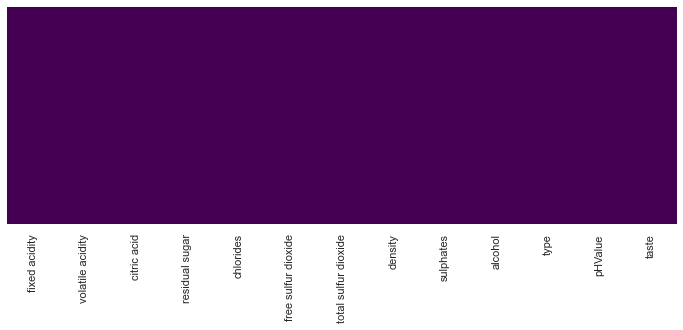

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
duplicate = df.duplicated().value_counts()
duplicate

False    5321
True     1177
dtype: int64

#### These are the total number of rows that are in our dataframe, that are unique 

In [19]:
non_duplicates = len(df) - duplicate[True]
non_duplicates

5321

#### Let Us Get Rid of these duplicated values as they can introduce 

In [20]:
df = df.drop_duplicates()

#### Let us Check to Ensure That We Dropped Those Rows that Will Introduce the Bias into the Model

In [21]:
df.duplicated().sum()

0

#### Our Dataset now contains only unique rows in our DataFrame

In [22]:
df.index

Int64Index([   0,    1,    2,    3,    6,    9,   10,   11,   12,   13,
            ...
            6487, 6488, 6489, 6490, 6491, 6492, 6493, 6494, 6496, 6497],
           dtype='int64', length=5321)

In [23]:
df = df.reset_index()

In [24]:
df.index

RangeIndex(start=0, stop=5321, step=1)

In [26]:
### instead of dropping it lets put back the null value with the median
### df.dropna(inplace=True) 
df['fixed acidity'] = df['fixed acidity'].fillna( df['fixed acidity'].median())

In [27]:
df.index

RangeIndex(start=0, stop=5321, step=1)

In [28]:
df = df.reset_index()

In [29]:
df.index

RangeIndex(start=0, stop=5321, step=1)

In [30]:
df['fixed acidity'].isnull().sum()

0

In [31]:
## Sanity Check 
df.isnull().sum()

level_0                 0
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64

#### DataSet is now clear of Null Values, let us continue and check for outliers using boxplots and intuition

In [32]:
print('Our New Length of Our DataFrame is: {}'.format(len(df)))

Our New Length of Our DataFrame is: 5321


####  Now Let Us Check For Outliers -- Let us Transform the 'LABEL' we are trying to classify for, with the specifications laid out prior. In order to do this, we must transform our 'taste' feature space as currently it is split into three categorical variables.

In [33]:
df.dtypes

level_0                   int64
index                     int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
taste                    object
dtype: object

#### We are to use the numerical value for 'taste' indicating 1-Good, and 0-ELSE(i.e. this includes anything that isn't good taste). Let us pay attention to only the good taste. THIS MAY introduce some bias, and overfitting due to the fact that there is such a large count difference between good and not good tasting wine(regardless of color)

#### In order to work with this dataset, we need to transform it by getting rid of the categorical variables and encoding them into binary values. As stated we only care about good and not good tasting classification of wines. We then drop the 'taste' feature from our dataset and only work with 'good_taste. In order to work with features: 'pHValue' and 'taste' we will need to transform those as well.

In [34]:
df['good_taste'] = df['taste'].apply(lambda x: 1 if x == str('good')else 0)
df = df.drop('taste',axis=1)

In [35]:
df.head()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
0,0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,0
1,1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,0
2,2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,0
3,3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,0
4,4,6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,0.47,9.6,white,very acidic,0


In [36]:
numerical_df = df[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol','good_taste']]
numerical_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,0.47,9.6,0


In [37]:
categorical_df = df[['type','pHValue']]
categorical_df.head()

,type,pHValue
0,white,very acidic
1,white,quite acidic
2,white,quite acidic
3,white,very acidic
4,white,very acidic


In [38]:
good_count = df['good_taste'].value_counts()[1]
bad_count = df['good_taste'].value_counts()[0]
print('Good Count:{} and Bad Count:{} and the proportion of Good to Bad Count is:{}'.format(good_count,bad_count,good_count/bad_count*100))

Good Count:1009 and Bad Count:4312 and the proportion of Good to Bad Count is:23.399814471243044


##### Let Us Inspect the columns that are left for categorical variables

In [39]:
df.select_dtypes(include=['object']).columns.tolist()

['type', 'pHValue']

In [40]:
df.describe()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
count,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000
mean,2660.000000,3251.772411,7.215138,0.344118,0.318515,5.047848,0.056694,30.034956,114.110693,0.996292,0.533336,10.549664,0.189626
std,1536.184722,1900.646428,1.319550,0.168235,0.147151,4.499991,0.036861,17.803802,56.769018,0.128832,0.149737,1.186223,0.392042
min,0.000000,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000
25%,1330.000000,1577.000000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000
50%,2660.000000,3241.000000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,0.510000,10.400000,0.000000
75%,3990.000000,4930.000000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,0.600000,11.400000,0.000000
max,5320.000000,6497.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000,1.000000


#### Very Important to Notice that that when we call the 'shape' we have 13 features and yet when we run correlation we don not have all features listed. Correlation only works on numerical|continquous features|variables. We have two columns which will need to be encoded in some manner. Let us see what they are...

#### Another Method 

#### We have to dummy encode 'pHValue', these will transform our categorical variables into continuous similiar to how we handled good_taste and  not good_taste. Let us inspect those features.

In [41]:
df['pHValue'].unique()

array(['very acidic', 'quite acidic', 'extremly acidic', 'midly acidic',
       'acidic', 'lightly acidic'], dtype=object)

In [42]:
df['pHValue'].nunique()

6

In [43]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [44]:
df['type'].nunique()

2

### LET BUILD A REGRESSION MODEL on WHAT WE HAVE RIGHT NOW FOR NUMERICAL FEATURES

In [45]:
Xnum_train, Xnum_test, ynum_train, ynum_test = train_test_split(numerical_df.drop('good_taste',axis=1), 
                                                    numerical_df['good_taste'], test_size=0.25, 
                                                    random_state=101)

In [46]:
modelnum = LogisticRegression()
modelnum.fit(Xnum_train,ynum_train)
predictions_num = modelnum.predict(Xnum_test)
print(classification_report(ynum_test,predictions_num))
print(accuracy_score(ynum_test, predictions_num))
print(f1_score(ynum_test, predictions_num))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1081
           1       0.55      0.26      0.35       250

    accuracy                           0.82      1331
   macro avg       0.70      0.61      0.62      1331
weighted avg       0.79      0.82      0.79      1331

0.8204357625845229
0.3523035230352304


#### WOW! 35% F1-Score but with an accuracy score of 82%. Fairly Bad with just our numerical data for logisitc regression. Logisitic Regression is meant to handle a large amount of features but there may be some issues with our numerical data. Let's Us Inspect it

In [47]:
numerical_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,0.47,9.6,0


In [48]:
numerical_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
count,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000
mean,7.215138,0.344118,0.318515,5.047848,0.056694,30.034956,114.110693,0.996292,0.533336,10.549664,0.189626
std,1.319550,0.168235,0.147151,4.499991,0.036861,17.803802,56.769018,0.128832,0.149737,1.186223,0.392042
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,0.510000,10.400000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,0.600000,11.400000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000,1.000000


In [49]:
numerical_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
fixed acidity,1.000000,0.214760,0.330286,-0.104410,0.288887,-0.281566,-0.327474,0.017054,0.304850,-0.102597,-0.049825
volatile acidity,0.214760,1.000000,-0.384220,-0.163632,0.367562,-0.348989,-0.400721,0.057453,0.227811,-0.065524,-0.144322
citric acid,0.330286,-0.384220,1.000000,0.146068,0.055284,0.130767,0.194846,0.028274,0.059069,-0.005223,0.060598
residual sugar,-0.104410,-0.163632,0.146068,1.000000,-0.123172,0.398758,0.487471,0.196183,-0.174592,-0.305388,-0.084794
chlorides,0.288887,0.367562,0.055284,-0.123172,1.000000,-0.186663,-0.269787,0.014960,0.404924,-0.269274,-0.161075
free sulfur dioxide,-0.281566,-0.348989,0.130767,0.398758,-0.186663,1.000000,0.720454,-0.016741,-0.198156,-0.170131,0.011371
total sulfur dioxide,-0.327474,-0.400721,0.194846,0.487471,-0.269787,0.720454,1.000000,0.011182,-0.275843,-0.248863,-0.067319
density,0.017054,0.057453,0.028274,0.196183,0.014960,-0.016741,0.011182,1.000000,0.020785,-0.002146,-0.013385
sulphates,0.304850,0.227811,0.059069,-0.174592,0.404924,-0.198156,-0.275843,0.020785,1.000000,-0.017495,0.036837
alcohol,-0.102597,-0.065524,-0.005223,-0.305388,-0.269274,-0.170131,-0.248863,-0.002146,-0.017495,1.000000,0.417420


#### It seems that the only variable here that truly coincides with good_taste wining is alcohol; This may be due to the large scaling of the numbers. We may have to revisit this...normalize the data after we inspect the numerical feature space more closely.


<AxesSubplot:xlabel='good_taste', ylabel='count'>

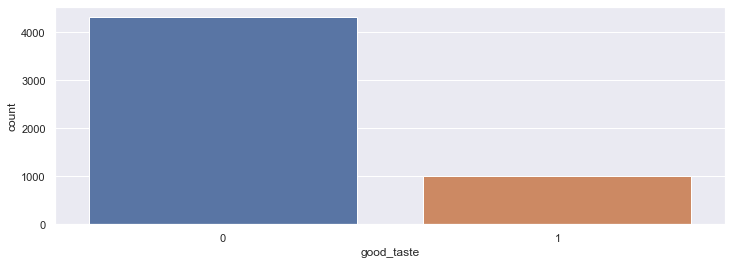

In [50]:
sns.countplot(df['good_taste'])

#### Let Us Inspect the Data to Inspect for Outliers

In [51]:
numerical_df.groupby('good_taste').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
good_taste,,,,,,,,,,
0,7.246939,0.355862,0.314202,5.232410,0.059566,29.937036,115.959184,0.997126,0.530668,10.310165
1,7.079237,0.293930,0.336947,4.259118,0.044421,30.453419,106.211100,0.992727,0.544737,11.573175


#### Let us check the numerical_df for outliers

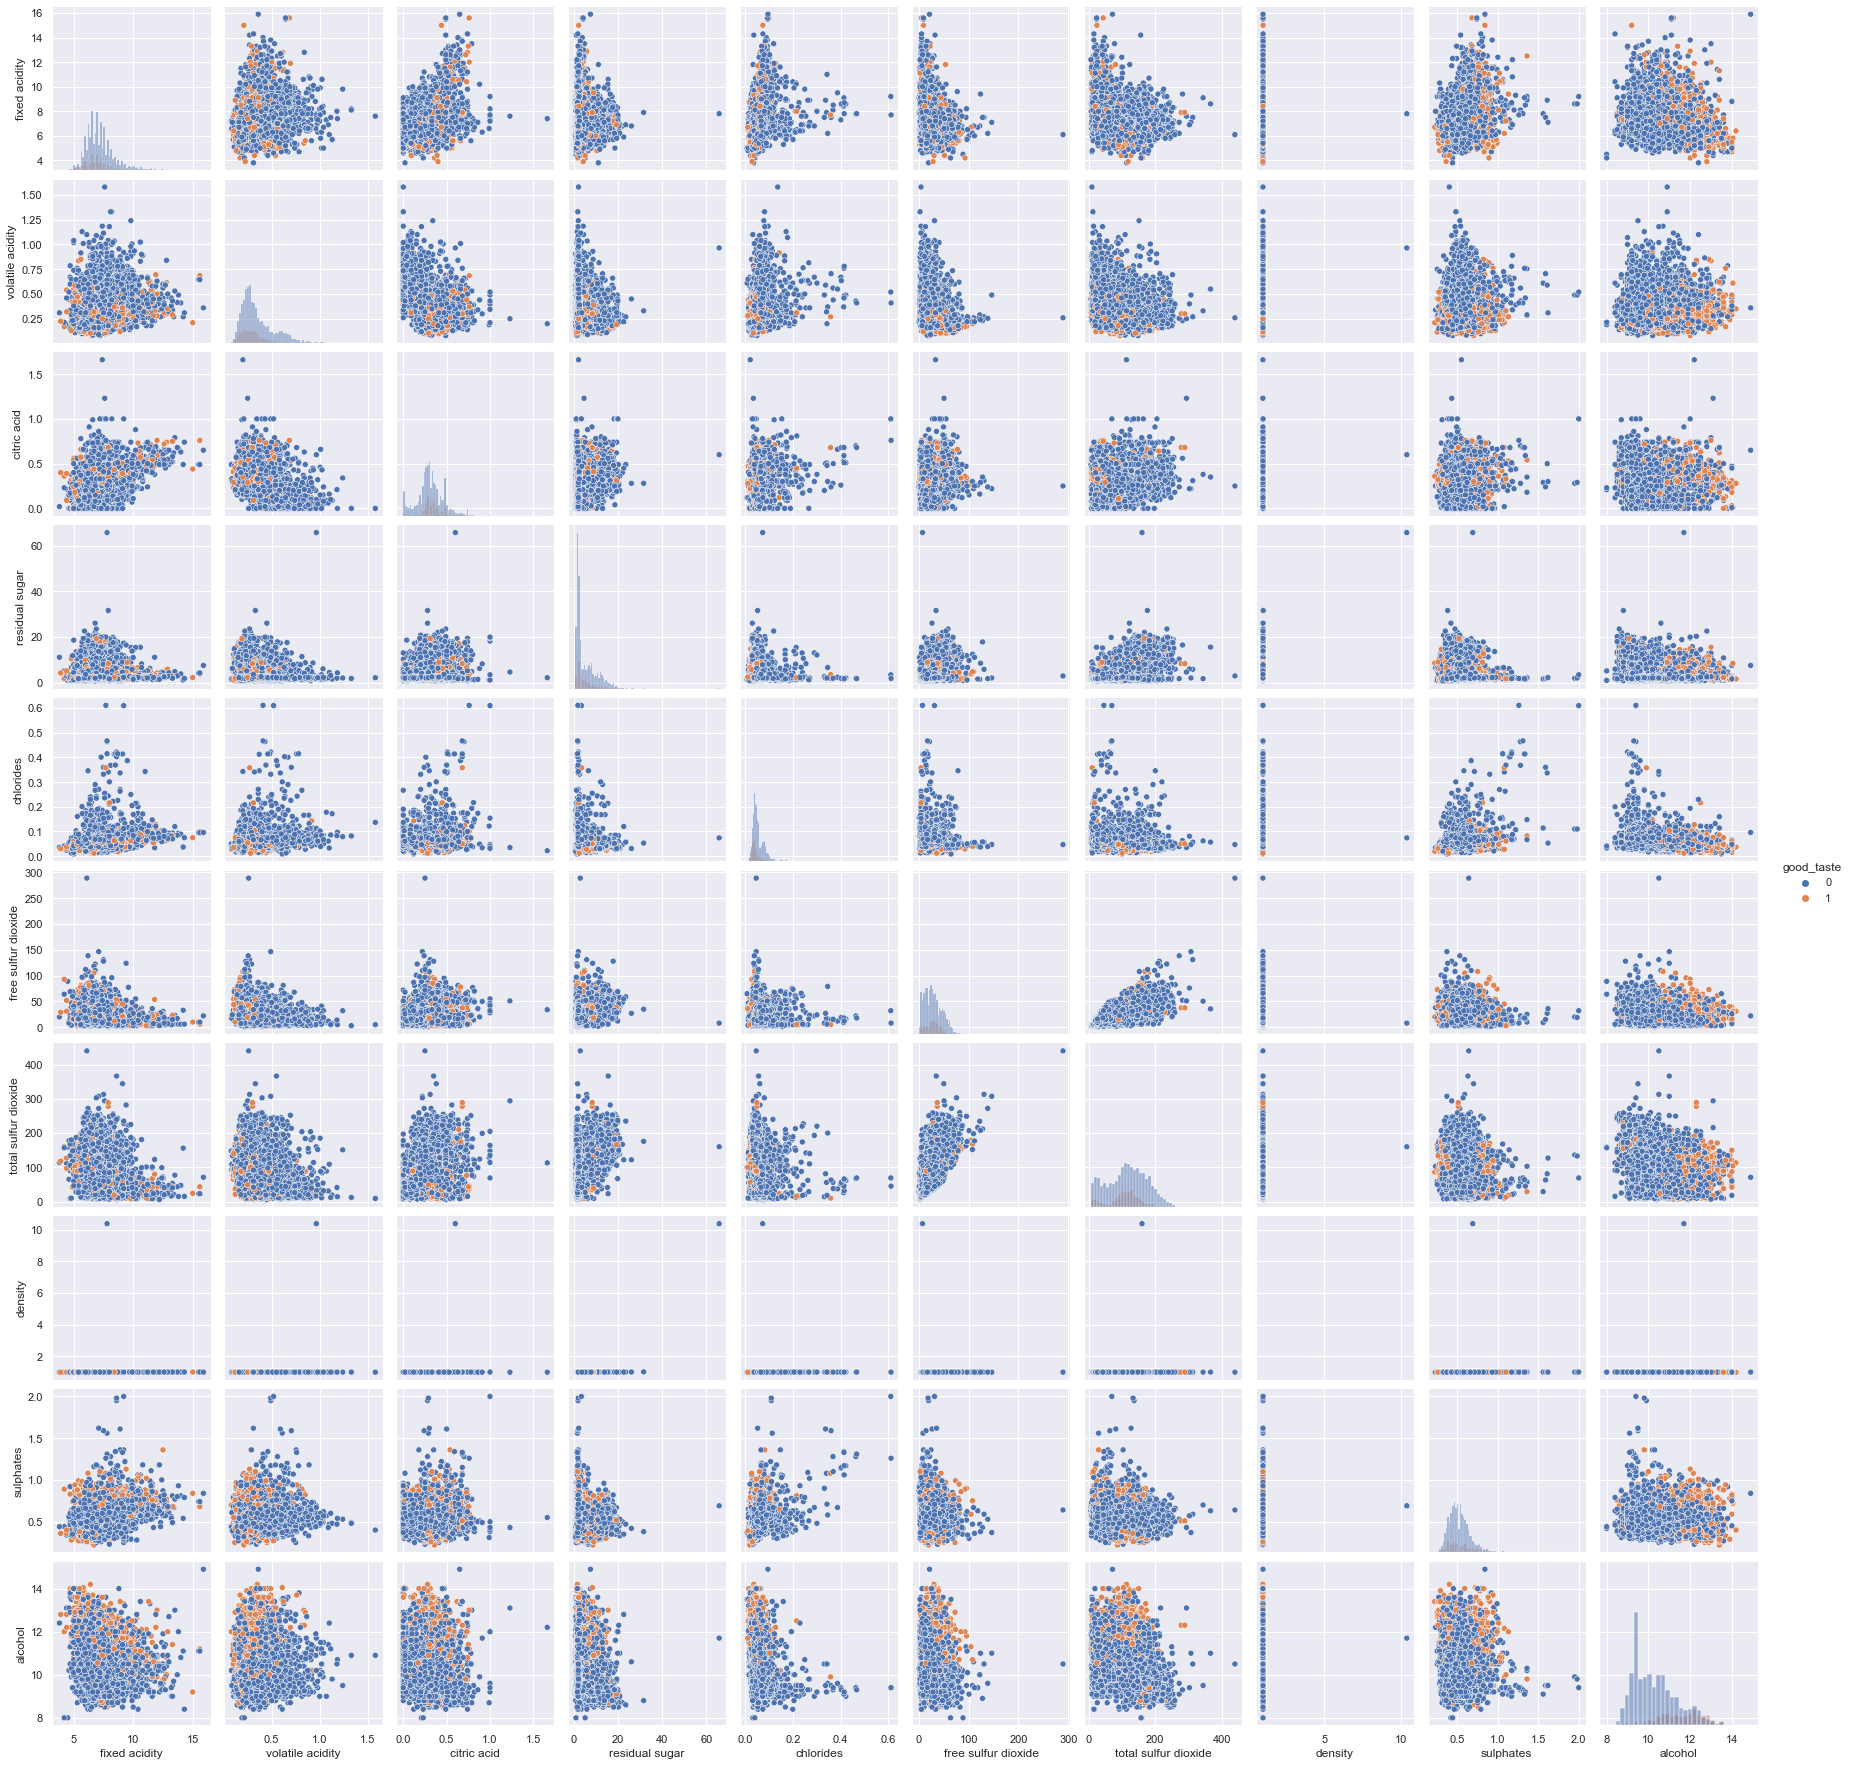

In [52]:
sns.pairplot(data=numerical_df,hue='good_taste',diag_kind="hist")

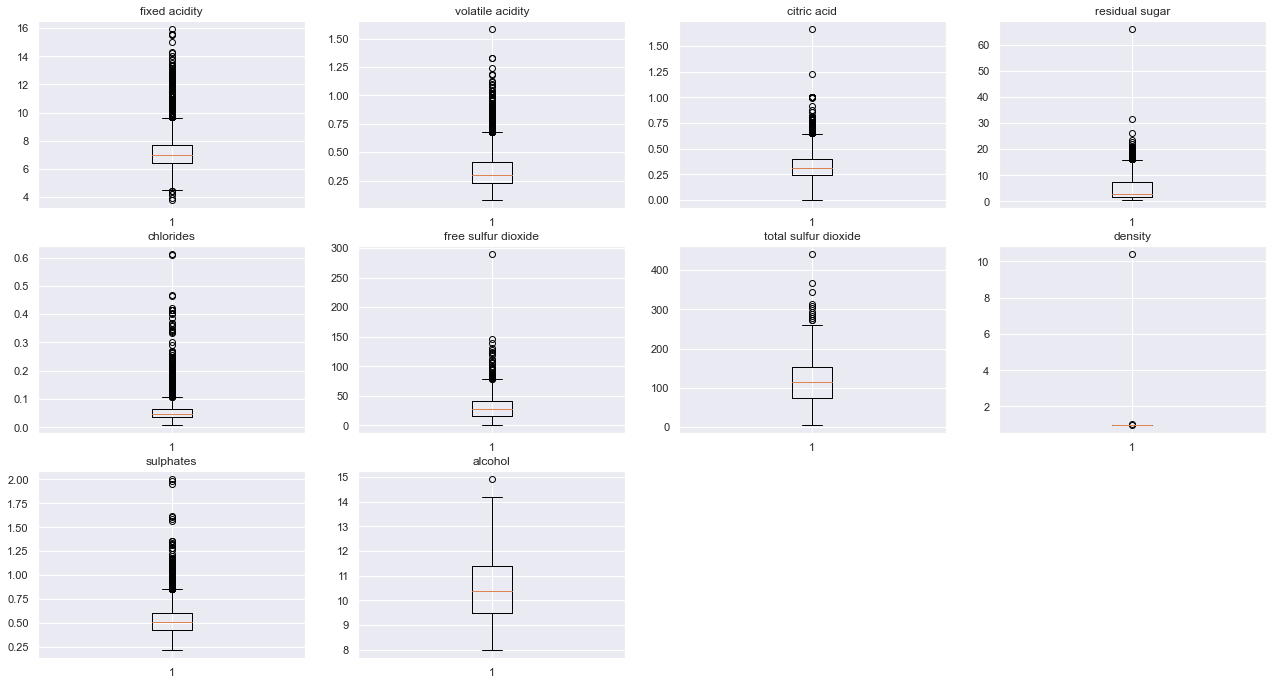

In [53]:
outliers_check = ['fixed acidity', 'volatile acidity', 'citric acid',
                            'residual sugar', 'chlorides', 'free sulfur dioxide',
                            'total sulfur dioxide', 'density', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,10):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[outliers_check[i]])
    plt.title(outliers_check[i])

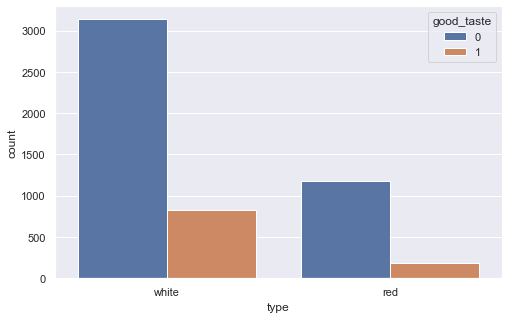

In [54]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'good_taste', data = df)
plt.show()

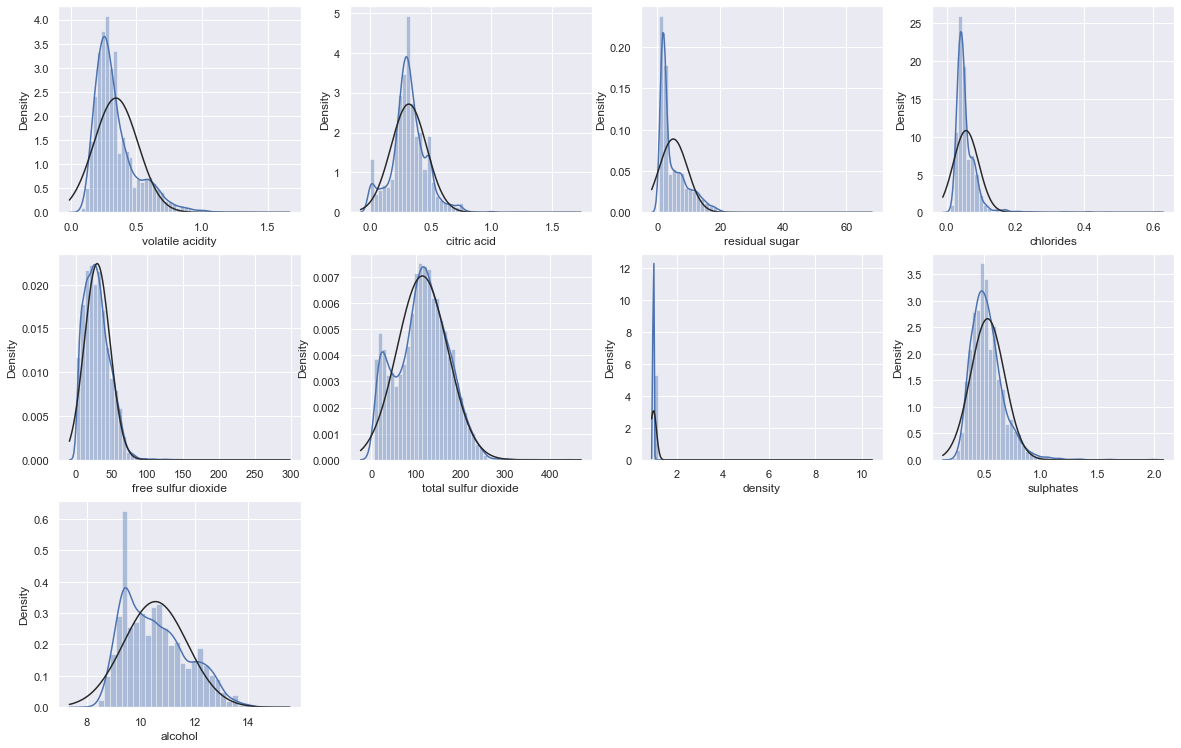

In [55]:
from scipy.stats import norm 
plt.figure(figsize = (20,22))

for i in range(1,10):
    plt.subplot(5,4,i)
    sns.distplot(df[outliers_check[i]], fit=norm)

#### Based off what we see here; We see for the most part a normal distribution for the majority of our numerical_features. But there are some issues. Let us inspect; 

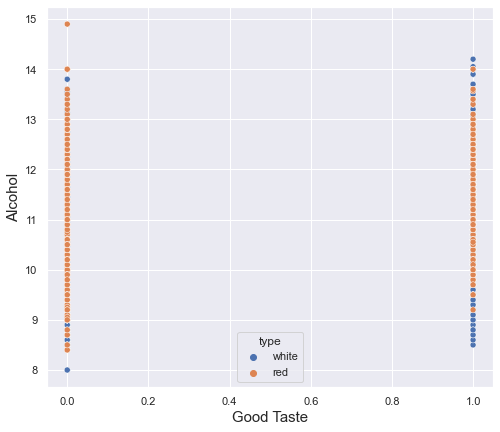

In [56]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='alcohol', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

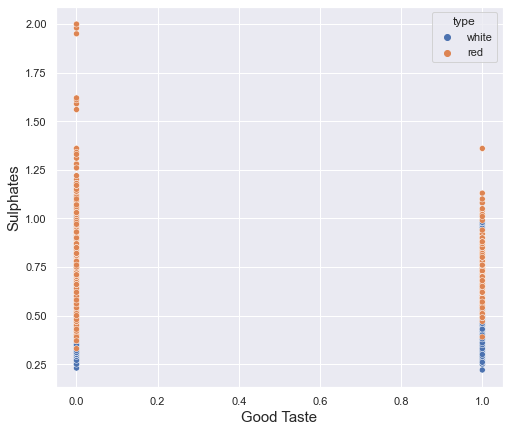

In [57]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='sulphates', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Sulphates', size =15)
plt.show()

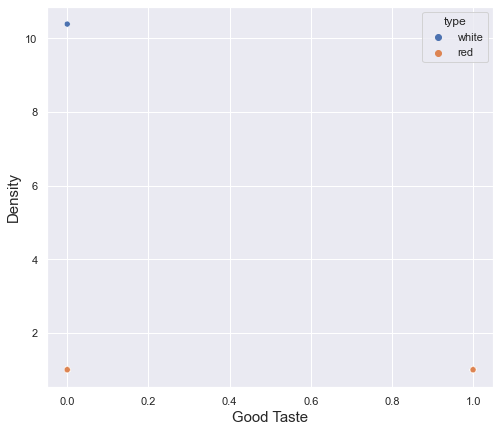

In [58]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='density', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Density', size =15)
plt.show()

#### This seems to be an issue above. Density needs fixing!

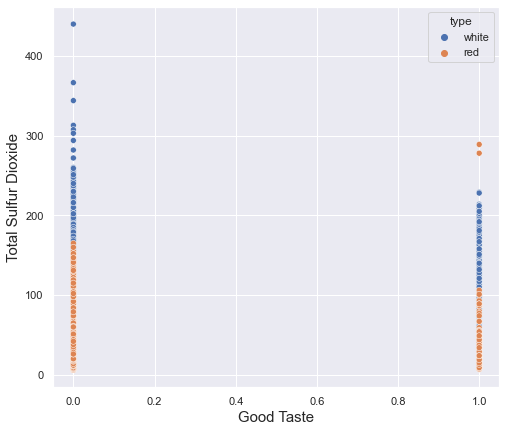

In [59]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='total sulfur dioxide', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Total Sulfur Dioxide', size =15)
plt.show()

#### I may want to fix this one as well.

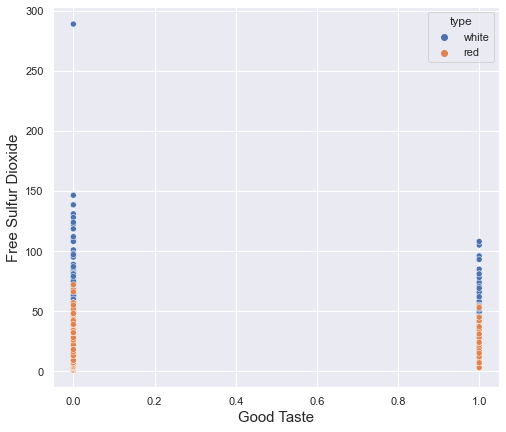

In [60]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='free sulfur dioxide', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Free Sulfur Dioxide', size =15)
plt.show()

### Let us fix this one as well.

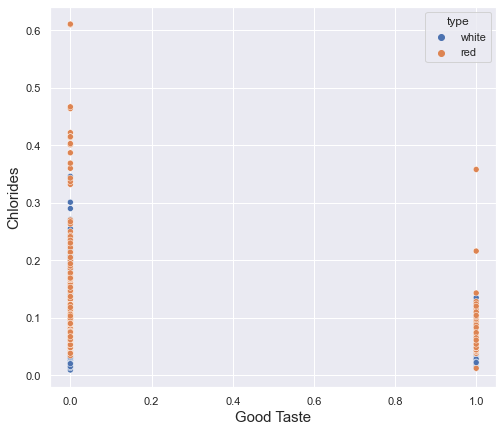

In [61]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='chlorides', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Chlorides', size =15)
plt.show()

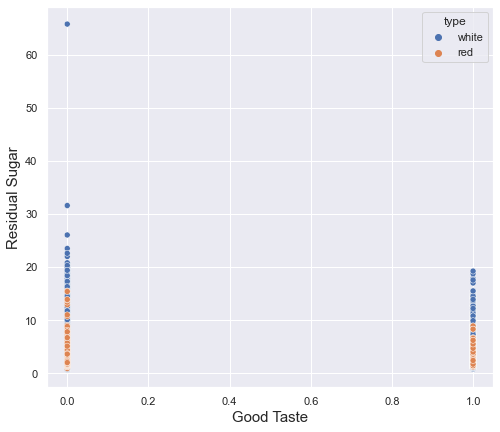

In [62]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='residual sugar', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Residual Sugar', size =15)
plt.show()

### I want to fix this one as well

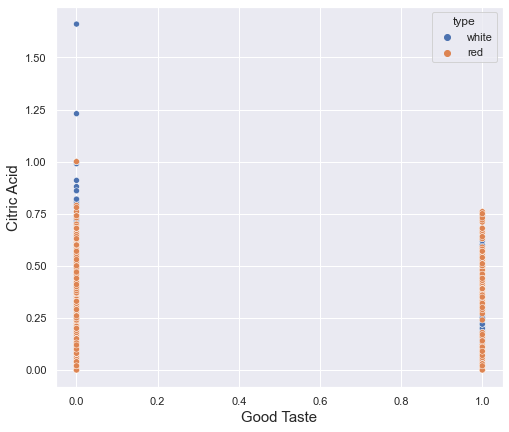

In [63]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='citric acid', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Citric Acid', size =15)
plt.show()

#### I want to fix this one as well

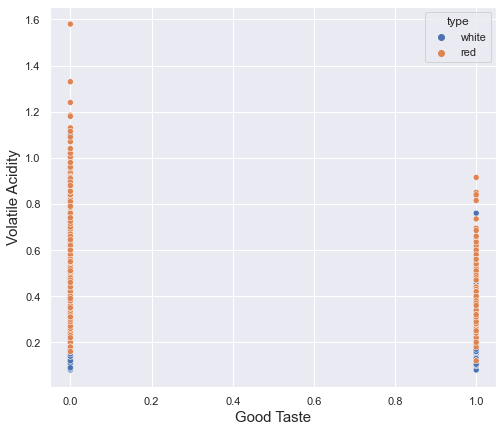

In [64]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='volatile acidity', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Volatile Acidity', size =15)
plt.show()

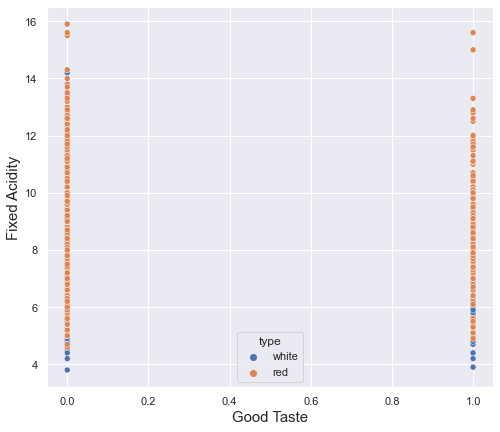

In [65]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='good_taste', 
                y='fixed acidity', 
                hue='type',
                data=df);
plt.xlabel('Good Taste',size=15)
plt.ylabel('Fixed Acidity', size =15)
plt.show()

#### It seems that many of these features have to be fixed for outliers, to ensure we get a more precise model. Let us fix these outliers by using a method called winsor.

### The only issue I see in our dataset, is we first must remove an issue in the 'density' feature space. This is clearly an error; as for the rest of our dataset. It would behoove us best to winsorize the rest of the numerical features, as we want to ensure we keep those values as I don't believe them to be incorrect albeit at the same time I don't want them to produce so much of a bias in my models.

<AxesSubplot:xlabel='density'>

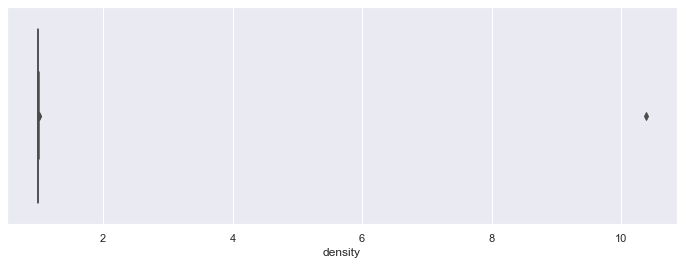

In [66]:
df['density'].describe()
sns.boxplot(x=df['density'])
# This is clearly a mistake that needs rectifying

##### Red Wine and White Wine are both liquids; the disparaging difference between the density showcased here is clearly an input error, and cleaning this input data point can only help our mode.

In [67]:
### display the Outlier
print(f'Number of Entries As of This Point:{df.shape[0]}')
df[df.density > 10]

Number of Entries As of This Point:5321


,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
2295,2295,2782,7.8,0.965,0.6,65.8,0.074,8.0,160.0,10.3898,0.69,11.7,white,quite acidic,0


In [68]:
print(f'PRIOR REMOVAL OF AGE OUTLIER\n{df.density.describe()}')

PRIOR REMOVAL OF AGE OUTLIER
count    5321.000000
mean        0.996292
std         0.128832
min         0.987110
25%         0.992200
50%         0.994640
75%         0.996770
max        10.389800
Name: density, dtype: float64


In [69]:
df = df[df.density < 10]
print(f'AFTER REMOVAL OF AGE OUTLIER\n{df.density.describe()}')

AFTER REMOVAL OF AGE OUTLIER
count    5320.000000
mean        0.994526
std         0.002903
min         0.987110
25%         0.992200
50%         0.994640
75%         0.996770
max         1.010300
Name: density, dtype: float64


<AxesSubplot:xlabel='density'>

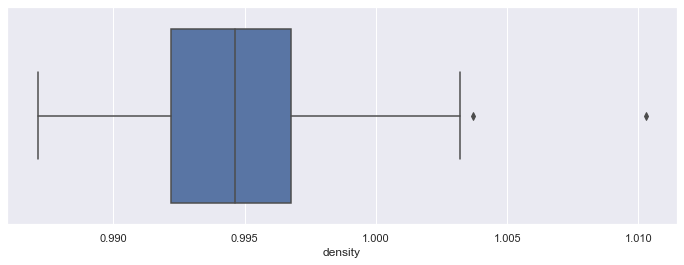

In [70]:
sns.boxplot(x=df['density'])
# This looks much better now

<AxesSubplot:xlabel='density'>

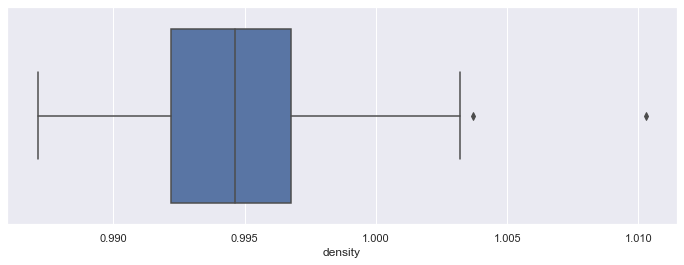

In [71]:
df['density'].describe()
sns.boxplot(x=df['density'])
# This is clearly a mistake that needs rectifying

##### Red Wine and White Wine are both liquids; the disparaging difference between the density showcased here is clearly an input error, and cleaning this input data point can only help our mode.

In [72]:
### display the Outlier
print(f'Number of Entries As of This Point:{numerical_df.shape[0]}')
numerical_df[numerical_df.density > 10]

Number of Entries As of This Point:5321


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
2295,7.8,0.965,0.6,65.8,0.074,8.0,160.0,10.3898,0.69,11.7,0


In [73]:
print(f'PRIOR REMOVAL OF AGE OUTLIER\n{numerical_df.density.describe()}')

PRIOR REMOVAL OF AGE OUTLIER
count    5321.000000
mean        0.996292
std         0.128832
min         0.987110
25%         0.992200
50%         0.994640
75%         0.996770
max        10.389800
Name: density, dtype: float64


In [74]:
numerical_df = numerical_df[numerical_df.density < 10]
print(f'AFTER REMOVAL OF AGE OUTLIER\n{numerical_df.density.describe()}')

AFTER REMOVAL OF AGE OUTLIER
count    5320.000000
mean        0.994526
std         0.002903
min         0.987110
25%         0.992200
50%         0.994640
75%         0.996770
max         1.010300
Name: density, dtype: float64


<AxesSubplot:xlabel='density'>

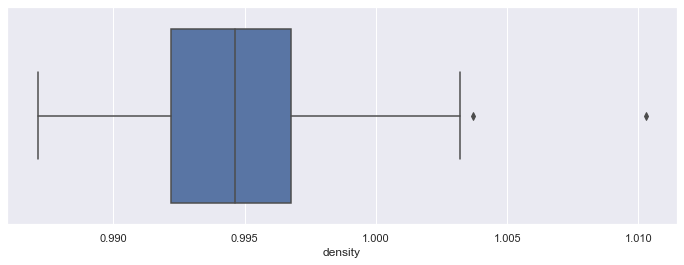

In [75]:
sns.boxplot(x=numerical_df['density'])
# This looks much better now

#### Winsorizing: It makes sense to winsorize data when we want to retain the observations that are at the extremes but we don’t want to take them too literally. -- https://www.kaggle.com/code/ecedolen/classification-logistic-regression-wine-quality/notebook

In [76]:
from scipy.stats.mstats import winsorize

In [77]:
def winsor(x, multiplier=3): 
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None 

In [78]:
wins_cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'sulphates', 'alcohol'] 

for i in range(1,len(wins_cols)):

    numerical_df[wins_cols[i]] = winsorize(numerical_df[wins_cols[i]], (0, winsor(numerical_df[wins_cols[i]])))

In [79]:
wins_cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'sulphates', 'alcohol'] 

for i in range(1,len(wins_cols)):

    df[wins_cols[i]] = winsorize(df[wins_cols[i]], (0, winsor(df[wins_cols[i]])))

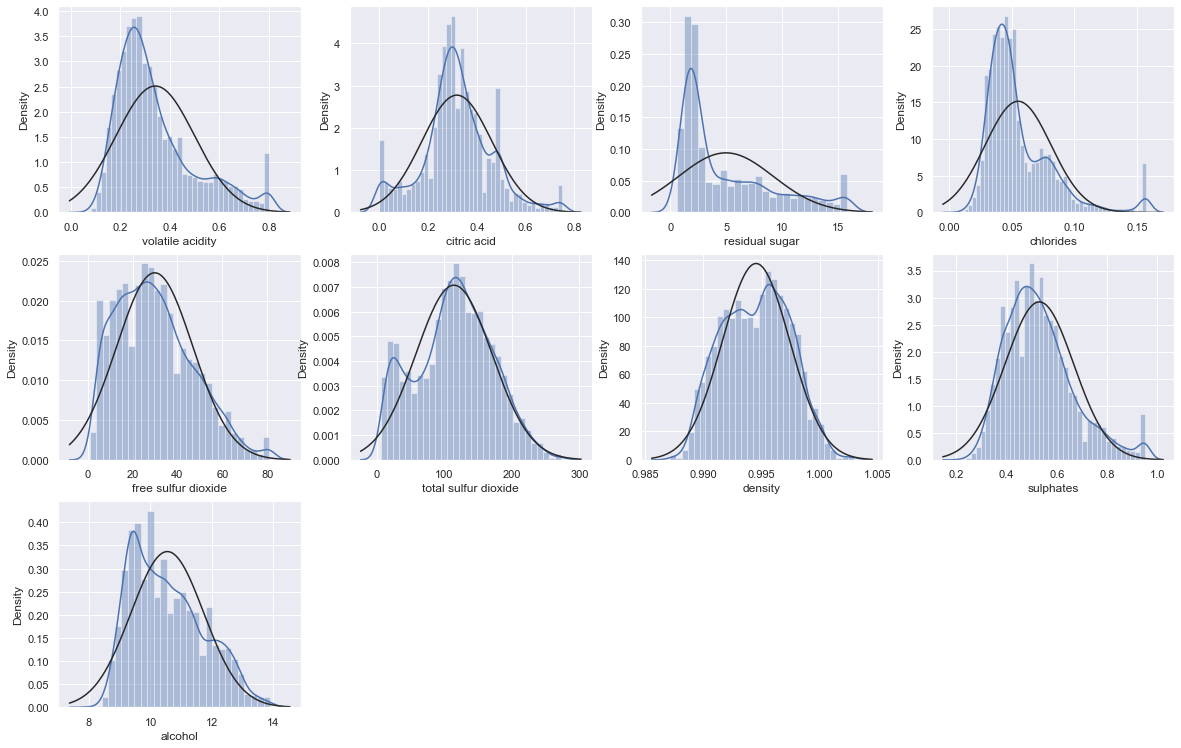

In [80]:
from scipy.stats import norm 
plt.figure(figsize = (20,22))

for i in range(1,10):
    plt.subplot(5,4,i)
    sns.distplot(df[outliers_check[i]], fit=norm)

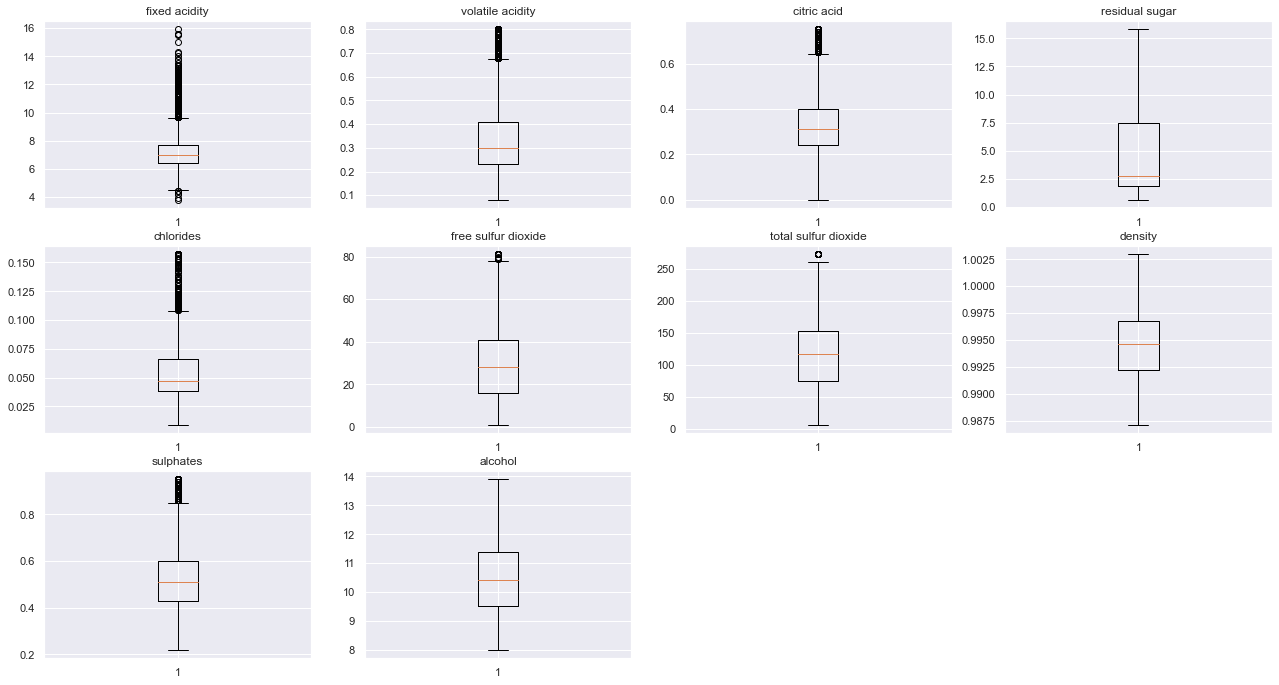

In [81]:
plt.figure(figsize=(22,20))

for i in range(0,10):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[outliers_check[i]])
    plt.title(outliers_check[i])

### LET BUILD A REGRESSION MODEL AGAIN on WHAT WE HAVE RIGHT NOW FOR NUMERICAL FEATURES

In [82]:
Xnum_train_2, Xnum_test_2, ynum_train_2, ynum_test_2 = train_test_split(numerical_df.drop('good_taste',axis=1), 
                                                    numerical_df['good_taste'], test_size=0.25, 
                                                    random_state=101)

In [83]:
modelnum_2 = LogisticRegression()
modelnum_2.fit(Xnum_train_2,ynum_train_2)
predictions_num_2 = modelnum_2.predict(Xnum_test_2)
print(classification_report(ynum_test_2,predictions_num_2))
print(accuracy_score(ynum_test_2, predictions_num_2))
print(f1_score(ynum_test_2, predictions_num_2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1091
           1       0.57      0.26      0.35       239

    accuracy                           0.83      1330
   macro avg       0.71      0.61      0.63      1330
weighted avg       0.80      0.83      0.80      1330

0.8315789473684211
0.35260115606936415


#### There was a slight increase but this is still fairly bad; let's try to normalize the numerical feature space in hopes of providing a better model. 

##### Now that we have our dataset in all continuous variables, let us ensure that we do not need to normalize any columns within our feature space; We will accomplish this with the .describe(). We are trying to see if there are a wide present different value ranges. Check the minimum and maximum values

In [84]:
df_copy = numerical_df 

In [85]:
df_copy_whole = df

In [86]:
df_copy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
count,5320.000000,5320.000000,5320.000000,5320.00000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215028,0.341419,0.317695,4.97390,0.055026,29.879981,114.008647,0.994525,0.530408,10.548969,0.189662
std,1.319650,0.158829,0.143821,4.23897,0.026358,16.977007,56.431823,0.002896,0.136623,1.184777,0.392070
min,3.800000,0.080000,0.000000,0.60000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.80000,0.038000,16.000000,74.000000,0.992200,0.430000,9.500000,0.000000
50%,7.000000,0.300000,0.310000,2.70000,0.047000,28.000000,116.000000,0.994640,0.510000,10.400000,0.000000
75%,7.700000,0.410000,0.400000,7.50000,0.066000,41.000000,153.000000,0.996770,0.600000,11.400000,0.000000
max,15.900000,0.800000,0.750000,15.80000,0.157000,81.000000,272.000000,1.002950,0.950000,13.900000,1.000000


In [87]:
df_copy.shape[1]

11

##### I believe the dataset does need to be normalized, as the max and means and minimum values are fairly all over the place and the scaling needs helped.

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_copy)
scaled = scaler.fit_transform(df_copy)
scaled_df_copy = pd.DataFrame(scaled, columns=df_copy.columns)

In [89]:
scaled_df_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,good_taste
0,0.264463,0.263889,0.480000,1.000000,0.243243,0.5500,0.616541,0.876894,0.315068,0.135593,0.0
1,0.206612,0.305556,0.453333,0.065789,0.270270,0.1625,0.473684,0.434975,0.369863,0.254237,0.0
2,0.355372,0.277778,0.533333,0.414474,0.277027,0.3625,0.342105,0.504419,0.301370,0.355932,0.0
3,0.280992,0.208333,0.426667,0.519737,0.331081,0.5750,0.676692,0.535985,0.246575,0.322034,0.0
4,0.198347,0.333333,0.213333,0.421053,0.243243,0.3625,0.488722,0.491793,0.342466,0.271186,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5315,0.247934,0.750000,0.106667,0.085526,0.398649,0.3375,0.120301,0.593434,0.821918,0.254237,0.0
5316,0.198347,0.722222,0.106667,0.092105,0.547297,0.3875,0.142857,0.491793,0.493151,0.423729,0.0
5317,0.173554,0.652778,0.133333,0.105263,0.358108,0.4750,0.169173,0.505682,0.739726,0.542373,0.0
5318,0.173554,0.784722,0.160000,0.092105,0.445946,0.3875,0.142857,0.527778,0.671233,0.372881,0.0


### LET BUILD A REGRESSION MODEL AGAIN To See If Our Normalization Had an Impact on WHAT WE HAVE RIGHT NOW FOR NUMERICAL FEATURES

In [90]:
Xnum_train_3, Xnum_test_3, ynum_train_3, ynum_test_3 = train_test_split(scaled_df_copy.drop('good_taste',axis=1), 
                                                    scaled_df_copy['good_taste'], test_size=0.25, 
                                                    random_state=101)

In [91]:
modelnum_3 = LogisticRegression()
modelnum_3.fit(Xnum_train_3,ynum_train_3)
predictions_num_3 = modelnum_3.predict(Xnum_test_3)
print(classification_report(ynum_test_3,predictions_num_3))
print(accuracy_score(ynum_test_3, predictions_num_3))
print(f1_score(ynum_test_3, predictions_num_3))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1091
         1.0       0.55      0.26      0.36       239

    accuracy                           0.83      1330
   macro avg       0.70      0.61      0.63      1330
weighted avg       0.80      0.83      0.80      1330

0.8293233082706767
0.3569405099150142


#### This is a very slight imporvement, I am unsure why this f-1 score is still so low. Let us input back our other two features, categorically to see if there is any improvemnt in our f1-scores. In order to do this we need to create dummy variables for our two(2) categorical features. 

In [92]:
scaled_df_copy.index

RangeIndex(start=0, stop=5320, step=1)

In [93]:
df_copy_whole.dtypes

level_0                   int64
index                     int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
good_taste                int64
dtype: object

#### Let Us Dummy Encode the Last Two Values That We Have Here, and Add Them to see if it helps our model without the last two features.

In [94]:
df_copy_whole['ph5'] = df_copy_whole['pHValue'].apply(lambda x: 1 if x == str('lightly acidic')else 0)
df_copy_whole['ph4'] = df_copy_whole['pHValue'].apply(lambda x: 1 if x == str('midly acidic')else 0)
df_copy_whole['ph3'] = df_copy_whole['pHValue'].apply(lambda x: 1 if x == str('acidic')else 0)
df_copy_whole['ph2'] = df_copy_whole['pHValue'].apply(lambda x: 1 if x == str('quite acidic')else 0)
df_copy_whole['ph1'] = df_copy_whole['pHValue'].apply(lambda x: 1 if x == str('very acidic')else 0)
df_copy_whole['ph0'] = df_copy_whole['pHValue'].apply(lambda x: 1 if x == str('extremly acidic')else 0)
df_copy_whole = df_copy_whole.drop('pHValue',axis=1)

In [95]:
df_copy_whole.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5311, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5319, 5320],
           dtype='int64', length=5320)

In [96]:
df_copy_whole['red_wine'] = df_copy_whole['type'].apply(lambda x: 1 if x == str('red')else 0)
df_copy_whole['white_wine'] = df_copy_whole['type'].apply(lambda x: 1 if x == str('white')else 0)
df_copy_whole = df_copy_whole.drop('type',axis=1)

In [97]:
df_copy_whole.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5311, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5319, 5320],
           dtype='int64', length=5320)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
scaler.fit(df_copy_whole)
scaled_2 = scaler_2.fit_transform(df_copy_whole)
scaled_df_copy_2 = pd.DataFrame(scaled_2, columns=df_copy_whole.columns)

### LET BUILD A REGRESSION MODEL AGAIN To See If Our Normalization with all of feature space in the hopes it will help our f1-score.

In [99]:
Xnum_train_3, Xnum_test_3, ynum_train_3, ynum_test_3 = train_test_split(scaled_df_copy_2.drop('good_taste',axis=1), 
                                                    scaled_df_copy_2['good_taste'], test_size=0.25, 
                                                    random_state=101)

In [100]:
modelnum_3 = LogisticRegression()
modelnum_3.fit(Xnum_train_3,ynum_train_3)
predictions_num_3 = modelnum_3.predict(Xnum_test_3)
print(classification_report(ynum_test_3,predictions_num_3))
print(accuracy_score(ynum_test_3, predictions_num_3))
print(f1_score(ynum_test_3, predictions_num_3))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1091
         1.0       0.60      0.33      0.43       239

    accuracy                           0.84      1330
   macro avg       0.73      0.64      0.67      1330
weighted avg       0.82      0.84      0.82      1330

0.8398496240601504
0.42895442359249325


#### Again another slight improvement with the addition of our two categorical last features. Unsure why our f1-score is so low at 43%

In [101]:
scaled_df_copy_2.describe()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,...,alcohol,good_taste,ph5,ph4,ph3,ph2,ph1,ph0,red_wine,white_wine
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,...,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,0.500013,0.500517,0.282234,0.363082,0.423594,0.287757,0.310989,0.361000,0.406048,0.468090,...,0.432029,0.189662,0.001692,0.122932,0.015038,0.406391,0.388722,0.065226,0.255451,0.744549
std,0.288782,0.292568,0.109062,0.220596,0.191761,0.278880,0.178094,0.212213,0.212150,0.182840,...,0.200810,0.392070,0.041100,0.328390,0.121714,0.491205,0.487506,0.246947,0.436155,0.436155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249953,0.242689,0.214876,0.208333,0.320000,0.078947,0.195946,0.187500,0.255639,0.321338,...,0.254237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500094,0.498923,0.264463,0.305556,0.413333,0.138158,0.256757,0.337500,0.413534,0.475379,...,0.406780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.750047,0.758850,0.322314,0.458333,0.533333,0.453947,0.385135,0.500000,0.552632,0.609848,...,0.576271,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
calling = scaled_df_copy_2.corr()
calling['good_taste']

level_0                -0.061920
index                  -0.062090
fixed acidity          -0.049786
volatile acidity       -0.145436
citric acid             0.064700
residual sugar         -0.082875
chlorides              -0.199401
free sulfur dioxide     0.013998
total sulfur dioxide   -0.067050
density                -0.300276
sulphates               0.045376
alcohol                 0.417796
good_taste              1.000000
ph5                    -0.008248
ph4                     0.027687
ph3                    -0.012500
ph2                     0.036072
ph1                    -0.038578
ph0                    -0.024879
red_wine               -0.081083
white_wine              0.081083
Name: good_taste, dtype: float64

In [103]:
correlations = scaled_df_copy_2.corr()
print(correlations)

                       level_0     index  fixed acidity  volatile acidity  \
level_0               1.000000  0.999884       0.254143          0.501524   
index                 0.999884  1.000000       0.250771          0.499819   
fixed acidity         0.254143  0.250771       1.000000          0.220674   
volatile acidity      0.501524  0.499819       0.220674          1.000000   
citric acid          -0.218054 -0.218350       0.336081         -0.395892   
residual sugar       -0.264791 -0.263561      -0.110006         -0.179930   
chlorides             0.437593  0.435996       0.365263          0.467095   
free sulfur dioxide  -0.372234 -0.370883      -0.291285         -0.367080   
total sulfur dioxide -0.603063 -0.601427      -0.329847         -0.410318   
density               0.198434  0.195700       0.487774          0.313963   
sulphates             0.378447  0.377321       0.311369          0.243380   
alcohol               0.108863  0.109581      -0.103578         -0.068886   

In [109]:
scaled_df_copy_2.shape[1]
# Note that we went from a length:13 feature space to Length:21

21

### We Have Now Normalized All of Our Data -- Finally Time to Start Working on Building Models with K-Fold Validation

In [122]:
#X are features used to determine 'good_taste'
X_white = scaled_df_copy_2.drop('good_taste',axis=1).drop('white_wine',axis=1).values
#Y is what we're trying to predict
Y_white = scaled_df_copy_2['good_taste'].values

In [124]:
#X are features used to determine 'good_taste'
X_red = scaled_df_copy_2.drop('good_taste', axis=1).drop('red_wine',axis=1).values
#Y is what we're trying to predict
Y_red = scaled_df_copy_2['good_taste'].values

In [125]:
#Split the data
#25% Testing Size; 75%Training Size 
X_train_white, X_test_white, Y_train_white, Y_test_white = train_test_split(X_white, Y_white, test_size = 0.25, random_state=random.randint(1,1000))

In [126]:
#Split the data
#25% Testing Size; 75%Training Size 
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_red, Y_red, test_size = 0.25, random_state=random.randint(1,1000))

##### Finally Time to Start Building the Model --> We will build Logistic, Decision Tree Model, and Random Forest

In [127]:
logistic_regression_model = LogisticRegression()

In [131]:
# fit our model with the training data 
logistic_regression_model.fit(X_train_white,Y_train_white)

LogisticRegression()

In [132]:
# obtain Y_prediction 
Y_prediction = logistic_regression_model.predict(X_test_white)

In [133]:
Y_prediction_probability = logistic_regression_model.predict_proba(X_test_white)[:,1]
Y_prediction_probability.round(2)

array([0.04, 0.13, 0.27, ..., 0.16, 0.04, 0.01])

In [134]:
logistic_regression_df = pd.DataFrame.from_dict( {'y_true': Y_test_white, 'y_pred': Y_prediction, 'probability': Y_prediction_probability} )
logistic_regression_df

,y_true,y_pred,probability
0,0.0,0.0,0.043701
1,0.0,0.0,0.133060
2,1.0,0.0,0.273003
3,0.0,0.0,0.451701
4,1.0,0.0,0.206281
...,...,...,...
1325,0.0,0.0,0.014803
1326,1.0,0.0,0.310135
1327,0.0,0.0,0.155844
1328,1.0,0.0,0.041980


In [136]:
f1_score(Y_test_white,Y_prediction)

0.42597402597402595

In [137]:
logistic_regression_model = LogisticRegression()

In [138]:
# fit our model with the training data 
logistic_regression_model.fit(X_train_red,Y_train_red)

LogisticRegression()

In [139]:
# obtain Y_prediction 
Y_prediction = logistic_regression_model.predict(X_test_red)

In [140]:
Y_prediction_probability = logistic_regression_model.predict_proba(X_test_red)[:,1]
Y_prediction_probability.round(2)

array([0.03, 0.26, 0.1 , ..., 0.21, 0.08, 0.16])

In [141]:
logistic_regression_df = pd.DataFrame.from_dict( {'y_true': Y_test_red, 'y_pred': Y_prediction, 'probability': Y_prediction_probability} )
logistic_regression_df

,y_true,y_pred,probability
0,0.0,0.0,0.029965
1,0.0,0.0,0.257042
2,1.0,0.0,0.104776
3,0.0,0.0,0.017692
4,1.0,0.0,0.378874
...,...,...,...
1325,0.0,0.0,0.184101
1326,0.0,0.0,0.021831
1327,0.0,0.0,0.214468
1328,0.0,0.0,0.081403


In [142]:
f1_score(Y_test_red,Y_prediction)

0.43076923076923074

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1081
         1.0       0.61      0.27      0.38       249

    accuracy                           0.83      1330
   macro avg       0.73      0.62      0.64      1330
weighted avg       0.81      0.83      0.80      1330

0.8315789473684211
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1072
         1.0       0.63      0.28      0.39       258

    accuracy                           0.83      1330
   macro avg       0.74      0.62      0.65      1330
weighted avg       0.81      0.83      0.80      1330

0.8293233082706767
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91      1083
         1.0       0.61      0.34      0.44       247

    accuracy                           0.84      1330
   macro avg       0.74      0.65      0.67      1330
weighted avg       0.82      0.84   

<AxesSubplot:xlabel='trial'>

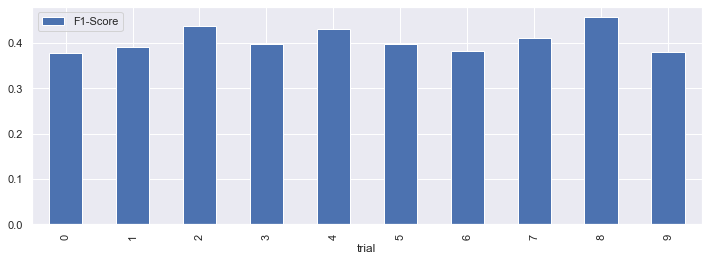

In [143]:
f1_score_holder = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_white, Y_white, test_size = 0.25, random_state=random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    y_predictions = model.predict(X_test)
    f1_score_holder.append(f1_score(Y_test,y_predictions))
    print(classification_report(Y_test, y_predictions))
    print(accuracy_score(Y_test, y_predictions))
    
logistic_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder})
logistic_model.plot.bar(x='trial', y='F1-Score')

In [144]:
print('Our Logistic Regression F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder)/len(f1_score_holder)*100))

Our Logistic Regression F1 Score Model Scored on K-Validation: 40.6069622546532


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1072
         1.0       0.64      0.31      0.41       258

    accuracy                           0.83      1330
   macro avg       0.74      0.63      0.66      1330
weighted avg       0.81      0.83      0.81      1330

0.8315789473684211
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1054
         1.0       0.66      0.27      0.38       276

    accuracy                           0.82      1330
   macro avg       0.75      0.62      0.64      1330
weighted avg       0.80      0.82      0.79      1330

0.8195488721804511
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1082
         1.0       0.59      0.31      0.41       248

    accuracy                           0.83      1330
   macro avg       0.72      0.63      0.65      1330
weighted avg       0.81      0.83   

<AxesSubplot:xlabel='trial'>

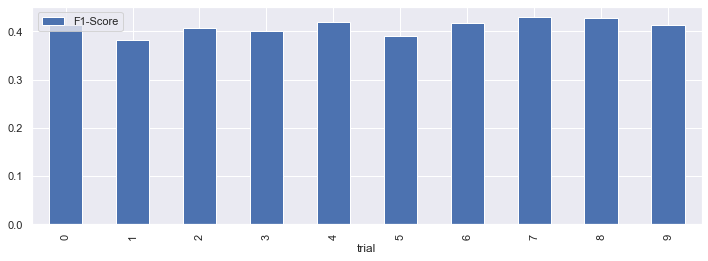

In [145]:
f1_score_holder = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_red, Y_red, test_size = 0.25, random_state=random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    y_predictions = model.predict(X_test)
    f1_score_holder.append(f1_score(Y_test,y_predictions))
    print(classification_report(Y_test, y_predictions))
    print(accuracy_score(Y_test, y_predictions))
    
logistic_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder})
logistic_model.plot.bar(x='trial', y='F1-Score')

In [146]:
print('Our Logistic Regression F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder)/len(f1_score_holder)*100))

Our Logistic Regression F1 Score Model Scored on K-Validation: 41.00295143145631


              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      1083
         1.0       0.45      0.42      0.44       247

    accuracy                           0.80      1330
   macro avg       0.66      0.65      0.66      1330
weighted avg       0.79      0.80      0.79      1330

0.7977443609022556
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1088
         1.0       0.42      0.38      0.40       242

    accuracy                           0.79      1330
   macro avg       0.65      0.63      0.64      1330
weighted avg       0.79      0.79      0.79      1330

0.793233082706767
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1062
         1.0       0.51      0.40      0.45       268

    accuracy                           0.80      1330
   macro avg       0.69      0.65      0.66      1330
weighted avg       0.79      0.80    

<AxesSubplot:xlabel='trial'>

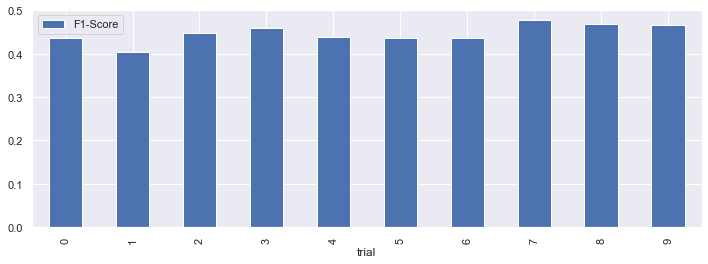

In [149]:
f1_score_holder_2 = []
for i in range(10):
    X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(X_white, Y_white, test_size = 0.25,random_state=random.randint(1,1000))
    model_tree = DecisionTreeClassifier(max_depth=10)
    model_tree.fit(X_train_tree, Y_train_tree)
    y_predictions_tree = model_tree.predict(X_test_tree)
    f1_score_holder_2.append(f1_score(Y_test_tree,y_predictions_tree))
    print(classification_report(Y_test_tree, y_predictions_tree))
    print(accuracy_score(Y_test_tree, y_predictions_tree))
    
dtree_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_2})
dtree_model.plot.bar(x='trial', y='F1-Score')

#### This was not much better, but still an improvement. It does appear to have been a bit more consistency with the results than our logistic regression model.

In [150]:
print('Our Decision Tree F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_2)/len(f1_score_holder_2)*100))

Our Decision Tree F1 Score Model Scored on K-Validation: 44.6777286038149


              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1087
         1.0       0.48      0.40      0.44       243

    accuracy                           0.81      1330
   macro avg       0.67      0.65      0.66      1330
weighted avg       0.80      0.81      0.80      1330

0.8097744360902256
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1085
         1.0       0.43      0.34      0.38       245

    accuracy                           0.79      1330
   macro avg       0.64      0.62      0.63      1330
weighted avg       0.78      0.79      0.78      1330

0.793984962406015
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1051
         1.0       0.55      0.44      0.49       279

    accuracy                           0.81      1330
   macro avg       0.70      0.67      0.68      1330
weighted avg       0.79      0.81    

<AxesSubplot:xlabel='trial'>

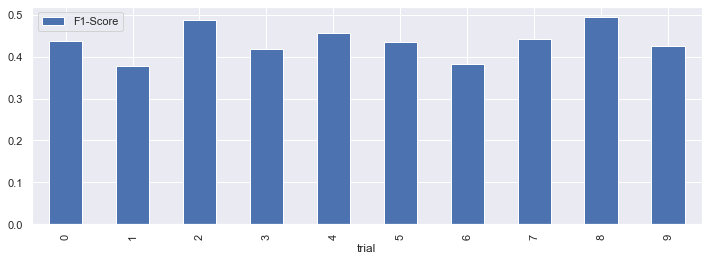

In [151]:
f1_score_holder_2 = []
for i in range(10):
    X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(X_red, Y_red, test_size = 0.25,random_state=random.randint(1,1000))
    model_tree = DecisionTreeClassifier(max_depth=10)
    model_tree.fit(X_train_tree, Y_train_tree)
    y_predictions_tree = model_tree.predict(X_test_tree)
    f1_score_holder_2.append(f1_score(Y_test_tree,y_predictions_tree))
    print(classification_report(Y_test_tree, y_predictions_tree))
    print(accuracy_score(Y_test_tree, y_predictions_tree))
    
dtree_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_2})
dtree_model.plot.bar(x='trial', y='F1-Score')

#### This was not much better, but still an improvement. It does appear to have been a bit more consistency with the results than our logistic regression model.

In [152]:
print('Our Decision Tree F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_2)/len(f1_score_holder_2)*100))

Our Decision Tree F1 Score Model Scored on K-Validation: 43.593551568750755


              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1292
         1.0       0.71      0.40      0.51       304

    accuracy                           0.85      1596
   macro avg       0.79      0.68      0.71      1596
weighted avg       0.84      0.85      0.84      1596

0.8546365914786967
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1300
         1.0       0.76      0.39      0.51       296

    accuracy                           0.86      1596
   macro avg       0.82      0.68      0.72      1596
weighted avg       0.85      0.86      0.85      1596

0.8634085213032582
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1269
         1.0       0.75      0.35      0.48       327

    accuracy                           0.84      1596
   macro avg       0.80      0.66      0.69      1596
weighted avg       0.83      0.84   

<AxesSubplot:xlabel='trial'>

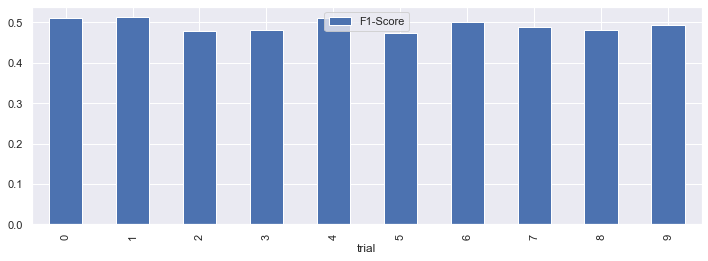

In [153]:
f1_score_holder_3 = []
for i in range(10):
    X_train_rftree, X_test_rftree, Y_train_rftree, Y_test_rftree = train_test_split(X_white, Y_white, test_size = 0.3,random_state=random.randint(1,1000))
    model_rftree = RandomForestClassifier(n_estimators=150)
    model_rftree.fit(X_train_rftree, Y_train_rftree)
    y_predictions_rftree = model_rftree.predict(X_test_rftree)
    f1_score_holder_3.append(f1_score(Y_test_rftree,y_predictions_rftree))
    print(classification_report(Y_test_rftree, y_predictions_rftree))
    print(accuracy_score(Y_test_rftree, y_predictions_rftree))
    
rfdtree_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_3})
rfdtree_model.plot.bar(x='trial', y='F1-Score')

In [154]:
print('Our Decision Tree F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_3)/len(f1_score_holder_3)*100))

Our Decision Tree F1 Score Model Scored on K-Validation: 49.32655818628794


              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91      1291
         1.0       0.65      0.36      0.46       305

    accuracy                           0.84      1596
   macro avg       0.76      0.66      0.68      1596
weighted avg       0.82      0.84      0.82      1596

0.8402255639097744
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1307
         1.0       0.70      0.34      0.46       289

    accuracy                           0.85      1596
   macro avg       0.78      0.65      0.69      1596
weighted avg       0.84      0.85      0.83      1596

0.8533834586466166
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1294
         1.0       0.66      0.36      0.47       302

    accuracy                           0.84      1596
   macro avg       0.76      0.66      0.69      1596
weighted avg       0.83      0.84   

<AxesSubplot:xlabel='trial'>

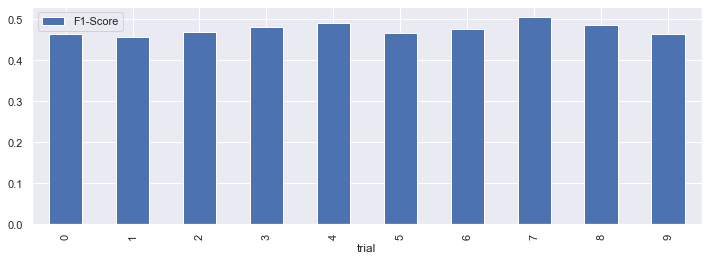

In [155]:
f1_score_holder_3 = []
for i in range(10):
    X_train_rftree, X_test_rftree, Y_train_rftree, Y_test_rftree = train_test_split(X_red, Y_red, test_size = 0.3,random_state=random.randint(1,1000))
    model_rftree = RandomForestClassifier(n_estimators=150)
    model_rftree.fit(X_train_rftree, Y_train_rftree)
    y_predictions_rftree = model_rftree.predict(X_test_rftree)
    f1_score_holder_3.append(f1_score(Y_test_rftree,y_predictions_rftree))
    print(classification_report(Y_test_rftree, y_predictions_rftree))
    print(accuracy_score(Y_test_rftree, y_predictions_rftree))
    
rfdtree_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_3})
rfdtree_model.plot.bar(x='trial', y='F1-Score')

In [156]:
print('Our Decision Tree F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_3)/len(f1_score_holder_3)*100))

Our Decision Tree F1 Score Model Scored on K-Validation: 47.5583902664746


### XGBoost

In [157]:
try:
    import xgboost as xgb
except:
    import os
    os.system("pip install xgboost")

In [158]:
X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(X_white, Y_white, test_size = 0.2)

In [159]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=random.randint(1,1000), use_label_encoder=False)
xgb_clf.fit(X_train_xgb, Y_train_xgb)

Y_pred_xgb = xgb_clf.predict(X_test_xgb)

print(classification_report(Y_test_xgb, Y_pred_xgb))
print(accuracy_score(Y_test_xgb, Y_pred_xgb))
print(f1_score(Y_test_xgb,Y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       868
         1.0       0.56      0.44      0.50       196

    accuracy                           0.83      1064
   macro avg       0.72      0.68      0.70      1064
weighted avg       0.82      0.83      0.83      1064

0.8336466165413534
0.49572649572649563


In [160]:
X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(X_red, Y_red, test_size = 0.2)

In [161]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=random.randint(1,1000), use_label_encoder=False)
xgb_clf.fit(X_train_xgb, Y_train_xgb)

Y_pred_xgb = xgb_clf.predict(X_test_xgb)

print(classification_report(Y_test_xgb, Y_pred_xgb))
print(accuracy_score(Y_test_xgb, Y_pred_xgb))
print(f1_score(Y_test_xgb,Y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       869
         1.0       0.60      0.52      0.56       195

    accuracy                           0.85      1064
   macro avg       0.75      0.72      0.73      1064
weighted avg       0.84      0.85      0.84      1064

0.8477443609022557
0.5573770491803279


              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      1302
         1.0       0.60      0.46      0.52       294

    accuracy                           0.84      1596
   macro avg       0.74      0.69      0.71      1596
weighted avg       0.83      0.84      0.84      1596

0.8446115288220551
0.5193798449612402
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      1296
         1.0       0.56      0.46      0.50       300

    accuracy                           0.83      1596
   macro avg       0.72      0.69      0.70      1596
weighted avg       0.82      0.83      0.82      1596

0.8295739348370927
0.5036496350364964
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1287
         1.0       0.61      0.54      0.57       309

    accuracy                           0.84      1596
   macro avg       0.75      0.73      0.74      159

<AxesSubplot:xlabel='trial'>

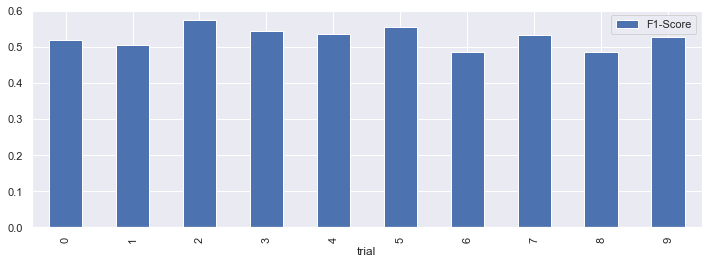

In [162]:
f1_score_holder_4 = []
for i in range(10):
    X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(X_white, Y_white, test_size = 0.3, random_state=random.randint(1,1000))
    xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=random.randint(1,1000), use_label_encoder=False)
    xgb_clf.fit(X_train_xgb, Y_train_xgb)
    Y_pred_xgb = xgb_clf.predict(X_test_xgb)
    f1_score_holder_4.append(f1_score(Y_test_xgb,Y_pred_xgb))
    print(classification_report(Y_test_xgb, Y_pred_xgb))
    print(accuracy_score(Y_test_xgb, Y_pred_xgb))
    print(f1_score(Y_test_xgb,Y_pred_xgb))
    
xgb_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_4})
xgb_model.plot.bar(x='trial', y='F1-Score')

In [163]:
print('Our XGB BOOST F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_4)/len(f1_score_holder_4)*100))

Our XGB BOOST F1 Score Model Scored on K-Validation: 52.63315519911246


              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1291
         1.0       0.64      0.50      0.56       305

    accuracy                           0.85      1596
   macro avg       0.76      0.72      0.73      1596
weighted avg       0.84      0.85      0.84      1596

0.849624060150376
0.5588235294117648
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1289
         1.0       0.61      0.49      0.54       307

    accuracy                           0.84      1596
   macro avg       0.75      0.71      0.72      1596
weighted avg       0.83      0.84      0.83      1596

0.8408521303258145
0.5398550724637681
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1280
         1.0       0.67      0.49      0.56       316

    accuracy                           0.85      1596
   macro avg       0.77      0.71      0.74      1596

<AxesSubplot:xlabel='trial'>

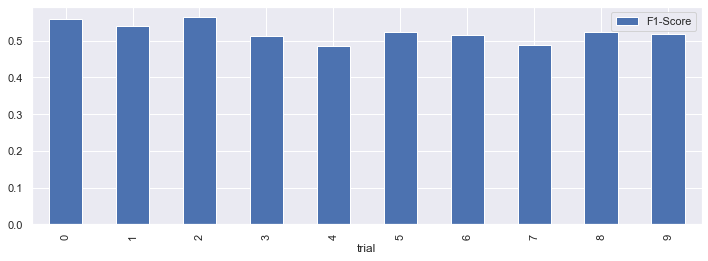

In [164]:
f1_score_holder_4 = []
for i in range(10):
    X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(X_red, Y_red, test_size = 0.3, random_state=random.randint(1,1000))
    xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=random.randint(1,1000), use_label_encoder=False)
    xgb_clf.fit(X_train_xgb, Y_train_xgb)
    Y_pred_xgb = xgb_clf.predict(X_test_xgb)
    f1_score_holder_4.append(f1_score(Y_test_xgb,Y_pred_xgb))
    print(classification_report(Y_test_xgb, Y_pred_xgb))
    print(accuracy_score(Y_test_xgb, Y_pred_xgb))
    print(f1_score(Y_test_xgb,Y_pred_xgb))
    
xgb_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_4})
xgb_model.plot.bar(x='trial', y='F1-Score')

In [165]:
print('Our XGB BOOST F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_4)/len(f1_score_holder_4)*100))

Our XGB BOOST F1 Score Model Scored on K-Validation: 52.345928422981814


#### Trying Ensemble Techniques ; Bagging Classifier

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1280
         1.0       0.64      0.23      0.34       316

    accuracy                           0.82      1596
   macro avg       0.74      0.60      0.62      1596
weighted avg       0.80      0.82      0.79      1596

0.8220551378446115
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1304
         1.0       0.66      0.26      0.37       292

    accuracy                           0.84      1596
   macro avg       0.75      0.61      0.64      1596
weighted avg       0.82      0.84      0.81      1596

0.8395989974937343
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1295
         1.0       0.66      0.28      0.39       301

    accuracy                           0.84      1596
   macro avg       0.76      0.62      0.65      1596
weighted avg       0.82      0.84   

<AxesSubplot:xlabel='trial'>

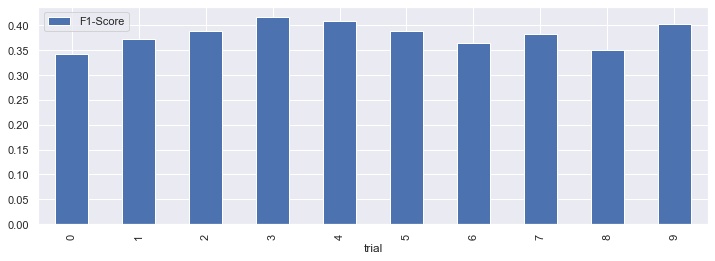

In [168]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

f1_score_holder_5 = []
for i in range(10):
    X_train_bag, X_test_bag, Y_train_bag, Y_test_bag = train_test_split(X_white, Y_white, test_size = 0.3, random_state=random.randint(1,1000))
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=101), n_estimators=500,
        max_samples=100, bootstrap=True)
    bag_clf.fit(X_train_bag, Y_train_bag)
    Y_pred_bag = bag_clf.predict(X_test_bag)
    f1_score_holder_5.append(f1_score(Y_test_bag,Y_pred_bag))
    print(classification_report(Y_test_bag, Y_pred_bag))
    print(accuracy_score(Y_test_bag, Y_pred_bag))

bag_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_5})
bag_model.plot.bar(x='trial', y='F1-Score')

In [169]:
print('Our Bagging F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_5)/len(f1_score_holder_5)*100))

Our Bagging F1 Score Model Scored on K-Validation: 38.20326800306623


              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1279
         1.0       0.69      0.22      0.33       317

    accuracy                           0.83      1596
   macro avg       0.76      0.60      0.62      1596
weighted avg       0.81      0.83      0.79      1596

0.825187969924812
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1308
         1.0       0.61      0.29      0.40       288

    accuracy                           0.84      1596
   macro avg       0.74      0.63      0.65      1596
weighted avg       0.82      0.84      0.81      1596

0.8389724310776943
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1284
         1.0       0.67      0.29      0.41       312

    accuracy                           0.83      1596
   macro avg       0.76      0.63      0.65      1596
weighted avg       0.81      0.83    

<AxesSubplot:xlabel='trial'>

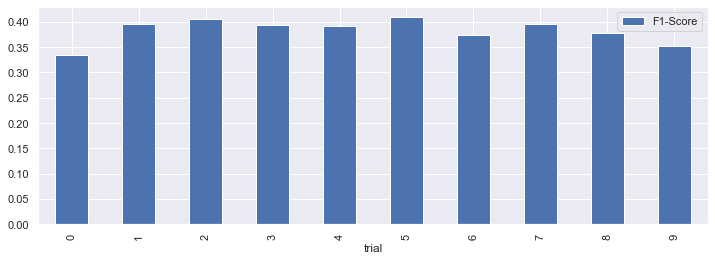

In [170]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

f1_score_holder_5 = []
for i in range(10):
    X_train_bag, X_test_bag, Y_train_bag, Y_test_bag = train_test_split(X_red, Y_red, test_size = 0.3, random_state=random.randint(1,1000))
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=101), n_estimators=500,
        max_samples=100, bootstrap=True)
    bag_clf.fit(X_train_bag, Y_train_bag)
    Y_pred_bag = bag_clf.predict(X_test_bag)
    f1_score_holder_5.append(f1_score(Y_test_bag,Y_pred_bag))
    print(classification_report(Y_test_bag, Y_pred_bag))
    print(accuracy_score(Y_test_bag, Y_pred_bag))

bag_model = pd.DataFrame( {'trial': range(10), 'F1-Score': f1_score_holder_5})
bag_model.plot.bar(x='trial', y='F1-Score')

In [171]:
print('Our Bagging F1 Score Model Scored on K-Validation: {}'.format(sum(f1_score_holder_5)/len(f1_score_holder_5)*100))

Our Bagging F1 Score Model Scored on K-Validation: 38.313050701865755


### Questions to Answer

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

### Q1: For the Best Fitted Model, Does It Work Better for the Red or White Wine or Similiar?
* Disregarding the ensemble technique models we used at the end; the best model was our Random Forest. It came up with an F1-SCORE measure of about 50%. It worked fairly similiarly for both types, which is showcased in my analysis above as I split the training data set to not include one of the 'types' of wines. Although the White Wine type had roughly 2% higher F1-Score than the Red Wine type. Albeit it is important to note the discrepancy that was showcased in our earlier countplot when we first explored the data. There was quite a discrepancy pertaining to the value counts that were showcased between white and red wine. Intrestingly enough, both of the type of models I created were fairly the same, and the discrepancy had less noise influence as we moved from logistic regression, to decision tree, to random forest. OUR XGBoost performed the best when considering the f1-score as its f1-scores were the highest values.

### Q2: Ensemble Methods Improve Your Models? 
* When using the bagging classifier technique on our decision tree actually decreased performance when classifying good tasting wine, no matter what the type of wine it was. This was showcased, when our decision tree model actually outperformed the Bagging Classifier Model when it was used in conjuction with a decision tree model. Interestingly enough, the XGBoost model actually recieved the highest f1-scores of about 53% for all of the models that we utilized in our example earlier.

### Q3: Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

* I ran correlations in my above analysis and indeed found their to be an interesting relationship between PH, and the wine's taste. Please see below;It seems that there is a positive correlation between the taste of wine and the acidity or PH. I rebranded these categorical variables myself to be in-line with the scientific definition of PH. The lowest PH(0,1) is the most acidic and the acidity becomes less and less as it goes from the scale of 0 to 5. Our analysis found that the PH4 or mildly acidic and PH2 quite acidic has the most positive correaltions when pertaining to the good_taste label we were trying to classify. If the pH was missing for one value and I needed to classify or make a predicition on whether the taste of that wine would be good or not, I would have to rely on the following features; Alcohol Content which had a very strong positive correlation with taste, followed by the Citric Acid feature, and finally the Sulphate feature. These were the features that had the strongest positive correlations pertaining to predicting whether the wine would taste good.  

In [172]:
calling['good_taste']

level_0                -0.061920
index                  -0.062090
fixed acidity          -0.049786
volatile acidity       -0.145436
citric acid             0.064700
residual sugar         -0.082875
chlorides              -0.199401
free sulfur dioxide     0.013998
total sulfur dioxide   -0.067050
density                -0.300276
sulphates               0.045376
alcohol                 0.417796
good_taste              1.000000
ph5                    -0.008248
ph4                     0.027687
ph3                    -0.012500
ph2                     0.036072
ph1                    -0.038578
ph0                    -0.024879
red_wine               -0.081083
white_wine              0.081083
Name: good_taste, dtype: float64